# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import math
from math import ceil

# Define Function

In [2]:
def enrichment_factor(y_true, y_score, percentage=1, pos_label=None, kind='fold'):
    """Computes enrichment factor for given percentage, i.e. EF_1% is
    enrichment factor for first percent of given samples. This function assumes
    that results are already sorted and samples with best predictions are first.

    Parameters
    ----------
    y_true : array, shape=[n_samples]
        True binary labels, in range {0,1} or {-1,1}. If positive label is
        different than 1, it must be explicitly defined.

    y_score : array, shape=[n_samples]
        Scores for tested series of samples

    percentage : int or float
        The percentage for which EF is being calculated

    pos_label: int
        Positive label of samples (if other than 1)

    kind: 'fold' or 'percentage' (default='fold')
        Two kinds of enrichment factor: fold and percentage.
        Fold shows the increase over random distribution (1 is random, the
        higher EF the better enrichment). Percentage returns the fraction of
        positive labels within the top x% of dataset.

    Returns
    -------
    ef : float
        Enrichment Factor for given percenage in range 0:1
    """
    if pos_label is None:
        pos_label = 1
    labels = y_true == pos_label
    assert labels.sum() > 0, "There are no correct predicions. Double-check the pos_label"
    assert len(labels) > 0, "Sample size must be greater than 0"
    # calculate fraction of positve labels
    n_perc = int(ceil(percentage / 100. * len(labels)))
    out = labels[:n_perc].sum() / n_perc
    if kind == 'fold':
        out /= (labels.sum() / len(labels))
    return out

In [5]:
def enrichment_factor_your_choice(data, scoring_function):
        data_active_score = pd.DataFrame(data[scoring_function])
        data_active_score['activity'] = data['int_class']
        data_active_score.sort_values(scoring_function, inplace=True, ascending=False)
        enrichment_value= round(enrichment_factor(data_active_score['activity'], data_active_score[scoring_function], percentage=3))
        return enrichment_value

In [6]:
def NEF1(data, scoring_function, percentage=1):
    data.sort_values(scoring_function, inplace=True, ascending=False)
    # Count the number of test molecules:
    N = data['int_class'] == pos_label
    # Calculate the number of test molecules in the top 1%:
    n = int(ceil(percentage / 100. * len(N)))
    # Count the number of true active molecules (true hits) in the top 1%:
    a = N[:n].sum()
    # Count the number of true active molecules (true hits) in the whole test set:
    A = N.sum()
    # calculate EF1%
    EF1 = round(100 * a / A, 2)
    print(f"EF1% = {EF1}")
    # Compute the maximal EF1% value:
    if A <= n:
        EF1max = 100
        print(f"EF1%max = {EF1max}")
    elif A > n:
        EF1max = round(100 * n / A, 2)
        print(f"EF1%max = {EF1max}")
    # Compute the NEF1% value:
    NEF1 = round(EF1 / EF1max, 3)
    print(f"NEF1% = {NEF1}")

# CNNscore

# Load actives data

In [127]:
os.chdir('Path to active docked complexes')
docked_sdf_active = glob.glob('mol*.sdf')
docked_sdf_active.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
docked_sdf_active

['mol_0_docked.sdf',
 'mol_1_docked.sdf',
 'mol_2_docked.sdf',
 'mol_3_docked.sdf',
 'mol_4_docked.sdf',
 'mol_5_docked.sdf',
 'mol_6_docked.sdf',
 'mol_7_docked.sdf',
 'mol_8_docked.sdf',
 'mol_9_docked.sdf',
 'mol_10_docked.sdf',
 'mol_11_docked.sdf',
 'mol_12_docked.sdf',
 'mol_13_docked.sdf',
 'mol_14_docked.sdf',
 'mol_15_docked.sdf',
 'mol_16_docked.sdf',
 'mol_17_docked.sdf',
 'mol_18_docked.sdf',
 'mol_19_docked.sdf',
 'mol_20_docked.sdf',
 'mol_21_docked.sdf',
 'mol_22_docked.sdf',
 'mol_23_docked.sdf',
 'mol_24_docked.sdf',
 'mol_25_docked.sdf',
 'mol_26_docked.sdf',
 'mol_27_docked.sdf',
 'mol_28_docked.sdf',
 'mol_29_docked.sdf',
 'mol_30_docked.sdf',
 'mol_31_docked.sdf',
 'mol_32_docked.sdf',
 'mol_33_docked.sdf',
 'mol_34_docked.sdf',
 'mol_35_docked.sdf',
 'mol_36_docked.sdf',
 'mol_37_docked.sdf',
 'mol_38_docked.sdf',
 'mol_39_docked.sdf',
 'mol_40_docked.sdf',
 'mol_41_docked.sdf',
 'mol_42_docked.sdf',
 'mol_43_docked.sdf',
 'mol_44_docked.sdf',
 'mol_45_docked.sdf'

# Create single multisdf file for actives

In [11]:
out=pybel.Outputfile(filename='multisdf_actives.sdf',format='sdf',overwrite=True)
for input_file in input_files:
    mol=next(pybel.readfile('sdf', input_file))
    out.write(mol)

# Get CNNscore and affinity using GNINA

In [14]:
!../gnina --score_only -r ../receptor.pdb -l multisdf_actives.sdf >& multisdf_actives_cnn.csv
!grep 'CNNscore' multisdf_actives_cnn.csv >& test_true_actives_cnn.csv
!grep 'CNNaffinity' multisdf_actives_cnn.csv >& test_true_actives_cnn_affinity.csv

# Load Decoys data

In [135]:
os.chdir('Path to decoys docked complexes')
docked_sdf_dec = glob.glob('mol*.sdf')
docked_sdf_dec.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
docked_sdf_dec

['mol_0_docked.sdf',
 'mol_1_docked.sdf',
 'mol_2_docked.sdf',
 'mol_3_docked.sdf',
 'mol_4_docked.sdf',
 'mol_5_docked.sdf',
 'mol_6_docked.sdf',
 'mol_7_docked.sdf',
 'mol_8_docked.sdf',
 'mol_9_docked.sdf',
 'mol_10_docked.sdf',
 'mol_11_docked.sdf',
 'mol_12_docked.sdf',
 'mol_13_docked.sdf',
 'mol_14_docked.sdf',
 'mol_15_docked.sdf',
 'mol_16_docked.sdf',
 'mol_17_docked.sdf',
 'mol_18_docked.sdf',
 'mol_19_docked.sdf',
 'mol_20_docked.sdf',
 'mol_21_docked.sdf',
 'mol_22_docked.sdf',
 'mol_23_docked.sdf',
 'mol_24_docked.sdf',
 'mol_25_docked.sdf',
 'mol_26_docked.sdf',
 'mol_27_docked.sdf',
 'mol_28_docked.sdf',
 'mol_29_docked.sdf',
 'mol_30_docked.sdf',
 'mol_31_docked.sdf',
 'mol_32_docked.sdf',
 'mol_33_docked.sdf',
 'mol_34_docked.sdf',
 'mol_35_docked.sdf',
 'mol_36_docked.sdf',
 'mol_37_docked.sdf',
 'mol_38_docked.sdf',
 'mol_39_docked.sdf',
 'mol_40_docked.sdf',
 'mol_41_docked.sdf',
 'mol_42_docked.sdf',
 'mol_43_docked.sdf',
 'mol_44_docked.sdf',
 'mol_45_docked.sdf'

In [137]:
out=pybel.Outputfile(filename='multisdf_decoys.sdf',format='sdf',overwrite=True)
for input_file in input_files:
    mol=next(pybel.readfile('sdf', input_file))
    out.write(mol)

In [138]:
!../gnina --score_only -r ../receptor.pdb -l multisdf_decoys.sdf >& multisdf_decoys_cnn.csv
!grep 'CNNscore' multisdf_decoys_cnn.csv >& test_decoys_cnn_cnn.csv
!grep 'CNNaffinity' multisdf_decoys_cnn.csv >& test_decoys_cnn_affinity.csv

# RFScoreVS

# Actives

In [30]:
os.chdir('Path to actives docked complexes')

In [32]:
!../rf-score-vs --receptor ../receptor.pdb multisdf_actives.sdf -O multisdf_actives_rfscore.sdf

In [33]:
!awk 'f{print;f=0} /RF/{f=1}' multisdf_actives_rfscore.sdf >& test_true_actives_rfscore.csv

# Decoys

In [141]:
os.chdir('Path to decoys docked complexes')

In [143]:
!../rf-score-vs --receptor ../receptor.pdb multisdf_decoys.sdf -O multisdf_decoys_rfscore.sdf

In [144]:
!awk 'f{print;f=0} /RF/{f=1}' multisdf_decoys_rfscore.sdf >& test_decoys_rfscore.csv

# SCORCH

# Actives

In [38]:
os.chdir('Path to active docked complexes')
docked_sdf_active = glob.glob('mol*.sdf')
docked_sdf_active.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
docked_sdf_active

['mol_0_docked.sdf',
 'mol_48_docked.sdf',
 'mol_54_docked.sdf',
 'mol_77_docked.sdf',
 'mol_59_docked.sdf',
 'mol_75_docked.sdf',
 'mol_9_docked.sdf',
 'mol_29_docked.sdf',
 'mol_13_docked.sdf',
 'mol_49_docked.sdf',
 'mol_68_docked.sdf',
 'mol_27_docked.sdf',
 'mol_52_docked.sdf',
 'mol_20_docked.sdf',
 'mol_67_docked.sdf',
 'mol_18_docked.sdf',
 'mol_84_docked.sdf',
 'mol_34_docked.sdf',
 'mol_3_docked.sdf',
 'mol_44_docked.sdf',
 'mol_82_docked.sdf',
 'mol_4_docked.sdf',
 'mol_24_docked.sdf',
 'docked_test_true_actives.sdf',
 'mol_35_docked.sdf',
 'mol_11_docked.sdf',
 'mol_71_docked.sdf',
 'mol_55_docked.sdf',
 'mol_5_docked.sdf',
 'mol_8_docked.sdf',
 'mol_23_docked.sdf',
 'mol_14_docked.sdf',
 'mol_66_docked.sdf',
 'mol_26_docked.sdf',
 'mol_7_docked.sdf',
 'mol_51_docked.sdf',
 'mol_76_docked.sdf',
 'mol_28_docked.sdf',
 'mol_78_docked.sdf',
 'mol_81_docked.sdf',
 'mol_69_docked.sdf',
 'mol_39_docked.sdf',
 'mol_73_docked.sdf',
 'mol_60_docked.sdf',
 'mol_10_docked.sdf',
 'mol_

# Convert sdf to pdbqt 

In [40]:
#convert all actives molecules into pdbqt
for input_file in input_files:
    mol=next(pybel.readfile('sdf', input_file))
    out=pybel.Outputfile(filename='Path to output pdbqt files'+input_file[:-4]+'.pdbqt',format='pdbqt',overwrite=True)
    out.write(mol)
    out.close()

In [116]:
# for scoring open terminal and activate scorch environment, then enter the following commond
# conda activate scorch
#go to scorch directory and run the following code
# python scorch.py --receptor path-to-receptor.pdb --ligand path-to-ligand files --out path-to-output-file --threads 40

# Decoys

In [174]:
os.chdir('Path to decoys docked complexes')
docked_sdf_dec = glob.glob('mol*.sdf')
docked_sdf_dec.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
docked_sdf_dec

# Convert sdf to pdbqt 

In [177]:
#convert all actives molecules into pdbqt
for input_file in input_files:
    mol=next(pybel.readfile('sdf', input_file))
    out=pybel.Outputfile(filename='/home/juni/working/mettl3/pdbqt_decoys_test/'+input_file[:-4]+'.pdbqt',format='pdbqt',overwrite=True)
    out.write(mol)
    out.close()

In [ ]:
# for scoring open terminal and activate scorch environment, then enter the following commond
# conda activate scorch
#go to scorch directory and run the following code
# python scorch.py --receptor path-to-receptor.pdb --ligand path-to-ligand files --out path-to-output-file --threads 40

# **Generate Virtual screening hits list**

# **Smina score**

In [62]:
os.chdir('Path to active docked complexes')
docked_sdf_active = glob.glob('mol*.sdf')
docked_sdf_active.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
docked_sdf_active

In [64]:
# get the score from the docked poses of test set 1 actives
smina_true_active_score=[]
poses=Chem.SDMolSupplier('multisdf_actives.sdf',False)
for p in list(poses):
    smina_true_active_score.append(abs(float(p.GetProp('minimizedAffinity'))))
smina_true_active_score = pd.DataFrame(smina_true_active_score)

In [66]:
os.chdir('Path to decoys docked complexes')
docked_sdf_dec = glob.glob('mol*.sdf')
docked_sdf_dec.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
docked_sdf_dec

In [150]:
# get the score from the docked poses of test set 1 actives
smina_decoys_score=[]
poses=Chem.SDMolSupplier('multisdf_decoys.sdf',False)
for p in list(poses):
    smina_decoys_score.append(abs(float(p.GetProp('minimizedAffinity'))))
smina_decoys_score = pd.DataFrame(smina_decoys_score)

In [153]:
columns = ['score', 'real_class']

In [154]:
smina_true_active_score['real_class']= 1
smina_true_active_score.columns = columns
smina_true_active_score

,score,real_class
0,10.89805,1
1,9.59924,1
2,9.23089,1
3,9.11434,1
4,10.31300,1
...,...,...
80,10.91373,1
81,10.98005,1
82,9.57899,1
83,9.71289,1


In [155]:
smina_decoys_score['real_class'] = 0
smina_decoys_score.columns = columns
smina_decoys_score

,score,real_class
0,9.69832,0
1,9.88207,0
2,10.01270,0
3,10.16071,0
4,11.46321,0
...,...,...
4245,7.33290,0
4246,8.68855,0
4247,9.03116,0
4248,9.03346,0


In [156]:
smina_score_VS_P2 =  pd.concat([smina_true_active_score, smina_decoys_score])
smina_score_VS_P2['normalized_score'] = (smina_score_VS_P2['score'] - smina_score_VS_P2['score'].min()) / (smina_score_VS_P2['score'].max() - smina_score_VS_P2['score'].min())
smina_score_VS_P2

,score,real_class,normalized_score
0,10.89805,1,0.788989
1,9.59924,1,0.626706
2,9.23089,1,0.580682
3,9.11434,1,0.566120
4,10.31300,1,0.715889
...,...,...,...
4245,7.33290,0,0.343534
4246,8.68855,0,0.512918
4247,9.03116,0,0.555726
4248,9.03346,0,0.556014


In [157]:
smina_score_VS_P2.to_csv('Path to output smina score', index=False)

# **CNN score**

In [158]:
cnn_score_active_test = pd.read_csv('/home/juni/working/mettl3/test_actives_docked/test_true_actives_cnn_affinity.csv', header=None, sep=':')
cnn_score_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_docked/test_decoys_cnn_affinity.csv', header=None, sep=':')

In [159]:
cnn_score_active_test = cnn_score_active_test.drop(cnn_score_active_test.columns[0], axis=1)
cnn_score_active_test['real_class'] = 1
cnn_score_active_test.columns = columns
cnn_score_active_test

,score,real_class
0,6.00208,1
1,6.03530,1
2,5.82543,1
3,6.00895,1
4,6.80689,1
...,...,...
80,6.51058,1
81,6.14678,1
82,6.14253,1
83,5.93267,1


In [160]:
cnn_score_deepcoy = cnn_score_deepcoy.drop(cnn_score_deepcoy.columns[0], axis=1)
cnn_score_deepcoy['real_class'] = 0
cnn_score_deepcoy.columns = columns
cnn_score_deepcoy

,score,real_class
0,6.08750,0
1,5.95905,0
2,5.88964,0
3,5.97018,0
4,6.40999,0
...,...,...
4245,5.54104,0
4246,5.60756,0
4247,5.52489,0
4248,5.93787,0


In [161]:
cnn_score_VS_P2 =  pd.concat([cnn_score_active_test, cnn_score_deepcoy])
cnn_score_VS_P2['normalized_score'] = (cnn_score_VS_P2['score'] - cnn_score_VS_P2['score'].min()) / (cnn_score_VS_P2['score'].max() - cnn_score_VS_P2['score'].min())
cnn_score_VS_P2

,score,real_class,normalized_score
0,6.00208,1,0.573581
1,6.03530,1,0.585811
2,5.82543,1,0.508548
3,6.00895,1,0.576110
4,6.80689,1,0.869868
...,...,...,...
4245,5.54104,0,0.403852
4246,5.60756,0,0.428341
4247,5.52489,0,0.397906
4248,5.93787,0,0.549943


In [162]:
cnn_score_VS_P2.to_csv('/home/juni/working/mettl3/cnn_score_VS_P2_hard.csv', index=False)

# **RFscore**

In [163]:
rfscore_true_active_test = pd.read_csv('/home/juni/working/mettl3/test_actives_docked/test_true_actives_rfscore.csv', header=None)
rfscore_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_docked/docked_decoys_rfscore.csv', header=None)

In [164]:
rfscore_true_active_test['real_class'] = 1
rfscore_true_active_test.columns = columns
rfscore_true_active_test

,score,real_class
0,6.102818,1
1,6.069282,1
2,6.033551,1
3,6.104111,1
4,6.081306,1
...,...,...
80,6.056694,1
81,6.113763,1
82,6.109988,1
83,6.046735,1


In [165]:
rfscore_deepcoy['real_class'] = 0
rfscore_deepcoy.columns = columns
rfscore_deepcoy

,score,real_class
0,6.103012,0
1,6.007301,0
2,6.147864,0
3,6.056592,0
4,6.062530,0
...,...,...
4245,6.025744,0
4246,6.186651,0
4247,6.097115,0
4248,5.981062,0


In [166]:
rfscore_VS_P2 =  pd.concat([rfscore_true_active_test, rfscore_deepcoy])
rfscore_VS_P2['normalized_score'] = (rfscore_VS_P2['score'] - rfscore_VS_P2['score'].min()) / (rfscore_VS_P2['score'].max() - rfscore_VS_P2['score'].min())
rfscore_VS_P2

,score,real_class,normalized_score
0,6.102818,1,0.340869
1,6.069282,1,0.266064
2,6.033551,1,0.186364
3,6.104111,1,0.343754
4,6.081306,1,0.292886
...,...,...,...
4245,6.025744,0,0.168951
4246,6.186651,0,0.527863
4247,6.097115,0,0.328148
4248,5.981062,0,0.069286


In [167]:
rfscore_VS_P2.to_csv('/home/juni/working/mettl3/rfscore_VS_P2_hard.csv', index=False)

# **SCORCH**

In [178]:
scorch_true_active_test = pd.read_csv('/home/juni/working/mettl3/test_actives_scorch.csv')
scorch_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_scorch.csv')

In [179]:
scorch_true_active_test = pd.DataFrame(scorch_true_active_test['SCORCH_score'])
scorch_true_active_test['real_class'] = 1
scorch_true_active_test.columns = columns
scorch_true_active_test

,score,real_class
0,0.26256,1
1,0.23797,1
2,0.21721,1
3,0.12762,1
4,0.12424,1
...,...,...
80,0.00489,1
81,0.00478,1
82,0.00366,1
83,0.00130,1


In [180]:
scorch_deepcoy = pd.DataFrame(scorch_deepcoy['SCORCH_score'])
scorch_deepcoy['real_class'] = 0
scorch_deepcoy.columns = columns
scorch_deepcoy

,score,real_class
0,0.29106,0
1,0.27668,0
2,0.26504,0
3,0.23280,0
4,0.23127,0
...,...,...
4245,0.00004,0
4246,0.00004,0
4247,0.00003,0
4248,0.00003,0


In [181]:
scorch_VS_P2 = pd.concat([scorch_true_active_test, scorch_deepcoy], ignore_index=True)
scorch_VS_P2['normalized_score'] = (scorch_VS_P2['score'] - scorch_VS_P2['score'].min()) / (scorch_VS_P2['score'].max() - scorch_VS_P2['score'].min())
scorch_VS_P2

,score,real_class,normalized_score
0,0.26256,1,0.902075
1,0.23797,1,0.817585
2,0.21721,1,0.746255
3,0.12762,1,0.438428
4,0.12424,1,0.426814
...,...,...,...
4330,0.00004,0,0.000069
4331,0.00004,0,0.000069
4332,0.00003,0,0.000034
4333,0.00003,0,0.000034


In [182]:
scorch_VS_P2.to_csv('/home/juni/working/mettl3/scorch_VS_P2_hard.csv', index=False)

In [18]:
os.chdir('/home/juni/working/mettl3/pdbqt_actives_test/')
input_files = glob.glob('*.pdbqt')
# input_files.remove('docked_test_true_actives.sdf')
# input_files.remove('docked_test_true_actives_rfscore.sdf')
input_files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
input_files

['mol_0_docked.pdbqt',
 'mol_1_docked.pdbqt',
 'mol_2_docked.pdbqt',
 'mol_3_docked.pdbqt',
 'mol_4_docked.pdbqt',
 'mol_5_docked.pdbqt',
 'mol_6_docked.pdbqt',
 'mol_7_docked.pdbqt',
 'mol_8_docked.pdbqt',
 'mol_9_docked.pdbqt',
 'mol_10_docked.pdbqt',
 'mol_11_docked.pdbqt',
 'mol_12_docked.pdbqt',
 'mol_13_docked.pdbqt',
 'mol_14_docked.pdbqt',
 'mol_15_docked.pdbqt',
 'mol_16_docked.pdbqt',
 'mol_17_docked.pdbqt',
 'mol_18_docked.pdbqt',
 'mol_19_docked.pdbqt',
 'mol_20_docked.pdbqt',
 'mol_21_docked.pdbqt',
 'mol_22_docked.pdbqt',
 'mol_23_docked.pdbqt',
 'mol_24_docked.pdbqt',
 'mol_25_docked.pdbqt',
 'mol_26_docked.pdbqt',
 'mol_27_docked.pdbqt',
 'mol_28_docked.pdbqt',
 'mol_29_docked.pdbqt',
 'mol_30_docked.pdbqt',
 'mol_31_docked.pdbqt',
 'mol_32_docked.pdbqt',
 'mol_33_docked.pdbqt',
 'mol_34_docked.pdbqt',
 'mol_35_docked.pdbqt',
 'mol_36_docked.pdbqt',
 'mol_37_docked.pdbqt',
 'mol_38_docked.pdbqt',
 'mol_39_docked.pdbqt',
 'mol_40_docked.pdbqt',
 'mol_41_docked.pdbqt',
 '

In [11]:
os.chdir('/home/juni/working/mettl3/hard_test_1_actives_docked/')
input_files = glob.glob('mol*.sdf')
input_files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
out=pybel.Outputfile(filename='docked_hard_test_1_actives.sdf',format='sdf',overwrite=True)
for input_file in input_files:
    mol=next(pybel.readfile('sdf', input_file))
    out.write(mol)
!../gnina --score_only -r ../receptor.pdb -l docked_hard_test_1_actives.sdf >& docked_hard_test_1_actives.csv
!grep 'CNNscore' docked_hard_test_1_actives.csv >& hard_test_1_actives_score.csv
!grep 'CNNaffinity' docked_hard_test_1_actives.csv >& hard_test_1_actives_affinity.csv
!../rf-score-vs --receptor ../receptor.pdb docked_hard_test_1_actives.sdf -O docked_hard_test_1_actives_rfscore.sdf
!awk 'f{print;f=0} /RF/{f=1}' docked_hard_test_1_actives_rfscore.sdf >& hard_test_1_actives_rfscore.csv

In [4]:
os.chdir('/home/juni/working/mettl3/hard_test_2_actives_docked/')
input_files = glob.glob('mol*.sdf')
input_files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
out=pybel.Outputfile(filename='docked_hard_test_2_actives.sdf',format='sdf',overwrite=True)
for input_file in input_files:
    mol=next(pybel.readfile('sdf', input_file))
    out.write(mol)
!../gnina --score_only -r ../receptor.pdb -l docked_hard_test_2_actives.sdf >& docked_hard_test_2_actives.csv
!grep 'CNNscore' docked_hard_test_2_actives.csv >& hard_test_2_actives_score.csv
!grep 'CNNaffinity' docked_hard_test_2_actives.csv >& hard_test_2_actives_affinity.csv
!../rf-score-vs --receptor ../receptor.pdb docked_hard_test_2_actives.sdf -O docked_hard_test_2_actives_rfscore.sdf
!awk 'f{print;f=0} /RF/{f=1}' docked_hard_test_2_actives_rfscore.sdf >& hard_test_2_actives_rfscore.csv

In [10]:
os.chdir('/home/juni/working/mettl3/hard_test_1_actives_docked/')
# get the score from the docked poses of test set 1 actives
smina_true_active_score=[]
poses=Chem.SDMolSupplier('docked_hard_test_1_actives.sdf',False)
for p in list(poses):
    smina_true_active_score.append(abs(float(p.GetProp('minimizedAffinity'))))
smina_true_active_score = pd.DataFrame(smina_true_active_score)
os.chdir('/home/juni/working/mettl3/test_decoys_docked/')
# get the score from the docked poses of test set 1 actives
smina_decoys_score=[]
poses=Chem.SDMolSupplier('docked_decoys.sdf',False)
for p in list(poses):
    smina_decoys_score.append(abs(float(p.GetProp('minimizedAffinity'))))
smina_decoys_score = pd.DataFrame(smina_decoys_score)

columns = ['score', 'real_class']
smina_true_active_score['real_class']= 1
smina_true_active_score.columns = columns
smina_true_active_score
smina_decoys_score['real_class'] = 0
smina_decoys_score.columns = columns
smina_decoys_score
smina_score_hard_test_1 =  pd.concat([smina_true_active_score, smina_decoys_score])
smina_score_hard_test_1['normalized_score'] = (smina_score_hard_test_1['score'] - smina_score_hard_test_1['score'].min()) / (smina_score_hard_test_1['score'].max() - smina_score_hard_test_1['score'].min())
smina_score_hard_test_1
smina_score_hard_test_1.to_csv('/home/juni/working/mettl3/smina_score_hard_test_1.csv', index=False)

In [11]:
smina_score_hard_test_1

,score,real_class,normalized_score
0,9.59924,1,0.626706
1,9.23089,1,0.580682
2,10.31300,1,0.715889
3,8.78721,1,0.525246
4,10.03346,1,0.680961
...,...,...,...
4245,7.33290,0,0.343534
4246,8.68855,0,0.512918
4247,9.03116,0,0.555726
4248,9.03346,0,0.556014


In [12]:
os.chdir('/home/juni/working/mettl3/hard_test_2_actives_docked/')
# get the score from the docked poses of test set 1 actives
smina_true_active_score=[]
poses=Chem.SDMolSupplier('docked_hard_test_2_actives.sdf',False)
for p in list(poses):
    smina_true_active_score.append(abs(float(p.GetProp('minimizedAffinity'))))
smina_true_active_score = pd.DataFrame(smina_true_active_score)
os.chdir('/home/juni/working/mettl3/test_decoys_docked/')
# get the score from the docked poses of test set 1 actives
smina_decoys_score=[]
poses=Chem.SDMolSupplier('docked_decoys.sdf',False)
for p in list(poses):
    smina_decoys_score.append(abs(float(p.GetProp('minimizedAffinity'))))
smina_decoys_score = pd.DataFrame(smina_decoys_score)

columns = ['score', 'real_class']
smina_true_active_score['real_class']= 1
smina_true_active_score.columns = columns
smina_true_active_score
smina_decoys_score['real_class'] = 0
smina_decoys_score.columns = columns
smina_decoys_score
smina_score_hard_test_2 =  pd.concat([smina_true_active_score, smina_decoys_score])
smina_score_hard_test_2['normalized_score'] = (smina_score_hard_test_2['score'] - smina_score_hard_test_2['score'].min()) / (smina_score_hard_test_2['score'].max() - smina_score_hard_test_2['score'].min())
smina_score_hard_test_2
smina_score_hard_test_2.to_csv('/home/juni/working/mettl3/smina_score_hard_test_2.csv', index=False)

In [7]:
#convert all actives molecules into pdbqt
os.chdir('/home/juni/working/mettl3/hard_test_2_actives_docked/')
input_files = glob.glob('mol*.sdf')
input_files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
for input_file in input_files:
    mol=next(pybel.readfile('sdf', input_file))
    out=pybel.Outputfile(filename='/home/juni/working/mettl3/hard_test_2_actives_pdbqt/'+input_file[:-4]+'.pdbqt',format='pdbqt',overwrite=True)
    out.write(mol)
    out.close()

In [6]:
#convert all actives molecules into pdbqt
os.chdir('/home/juni/working/mettl3/hard_test_1_actives_docked/')
input_files = glob.glob('mol*.sdf')
input_files.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
for input_file in input_files:
    mol=next(pybel.readfile('sdf', input_file))
    out=pybel.Outputfile(filename='/home/juni/working/mettl3/hard_test_1_actives_pdbqt/'+input_file[:-4]+'.pdbqt',format='pdbqt',overwrite=True)
    out.write(mol)
    out.close()
# for scoring open terminal and activate scorch environment, then enter the following commond
# conda activate scorch
#go to scorch directory and run the following code
# python scorch.py --receptor path-to-receptor.pdb --ligand path-to-ligand.mol2 --out path-to-output-file --threads 40
#in my case 
#python scorch.py --receptor /home/juni/working/ythdf/06_generic/receptor.pdb --ligand /home/juni/working/ythdf/06_generic/test_actives/pdbqt_actives/ --out /home/juni/working/ythdf/06_generic/test_actives/test_actives_scorch.csv --threads 40

In [14]:
cnn_score_active_test = pd.read_csv('/home/juni/working/mettl3/hard_test_1_actives_docked/hard_test_1_actives_affinity.csv', header=None, sep=':')
cnn_score_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_docked/test_decoys_cnn_affinity.csv', header=None, sep=':')
cnn_score_active_test = cnn_score_active_test.drop(cnn_score_active_test.columns[0], axis=1)
cnn_score_active_test['real_class'] = 1
cnn_score_active_test.columns = columns
cnn_score_active_test
cnn_score_deepcoy = cnn_score_deepcoy.drop(cnn_score_deepcoy.columns[0], axis=1)
cnn_score_deepcoy['real_class'] = 0
cnn_score_deepcoy.columns = columns
cnn_score_deepcoy
cnn_score_hard_test_1 =  pd.concat([cnn_score_active_test, cnn_score_deepcoy])
cnn_score_hard_test_1['normalized_score'] = (cnn_score_hard_test_1['score'] - cnn_score_hard_test_1['score'].min()) / (cnn_score_hard_test_1['score'].max() - cnn_score_hard_test_1['score'].min())
cnn_score_hard_test_1
cnn_score_hard_test_1.to_csv('/home/juni/working/mettl3/cnn_score_hard_test_1.csv', index=False)

In [16]:
cnn_score_active_test = pd.read_csv('/home/juni/working/mettl3/hard_test_2_actives_docked/hard_test_2_actives_affinity.csv', header=None, sep=':')
cnn_score_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_docked/test_decoys_cnn_affinity.csv', header=None, sep=':')
cnn_score_active_test = cnn_score_active_test.drop(cnn_score_active_test.columns[0], axis=1)
cnn_score_active_test['real_class'] = 1
cnn_score_active_test.columns = columns
cnn_score_active_test
cnn_score_deepcoy = cnn_score_deepcoy.drop(cnn_score_deepcoy.columns[0], axis=1)
cnn_score_deepcoy['real_class'] = 0
cnn_score_deepcoy.columns = columns
cnn_score_deepcoy
cnn_score_hard_test_2 =  pd.concat([cnn_score_active_test, cnn_score_deepcoy])
cnn_score_hard_test_2['normalized_score'] = (cnn_score_hard_test_2['score'] - cnn_score_hard_test_2['score'].min()) / (cnn_score_hard_test_2['score'].max() - cnn_score_hard_test_2['score'].min())
cnn_score_hard_test_2
cnn_score_hard_test_2.to_csv('/home/juni/working/mettl3/cnn_score_hard_test_2.csv', index=False)

In [18]:
rfscore_true_active_test = pd.read_csv('/home/juni/working/mettl3/hard_test_1_actives_docked/hard_test_1_actives_rfscore.csv', header=None)
rfscore_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_docked/docked_decoys_rfscore.csv', header=None)
rfscore_true_active_test['real_class'] = 1
rfscore_true_active_test.columns = columns
rfscore_true_active_test
rfscore_deepcoy['real_class'] = 0
rfscore_deepcoy.columns = columns
rfscore_deepcoy
rfscore_hard_test_1 =  pd.concat([rfscore_true_active_test, rfscore_deepcoy])
rfscore_hard_test_1['normalized_score'] = (rfscore_hard_test_1['score'] - rfscore_hard_test_1['score'].min()) / (rfscore_hard_test_1['score'].max() - rfscore_hard_test_1['score'].min())
rfscore_hard_test_1
rfscore_hard_test_1.to_csv('/home/juni/working/mettl3/rfscore_hard_test_1.csv', index=False)

In [19]:
rfscore_true_active_test = pd.read_csv('/home/juni/working/mettl3/hard_test_2_actives_docked/hard_test_2_actives_rfscore.csv', header=None)
rfscore_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_docked/docked_decoys_rfscore.csv', header=None)
rfscore_true_active_test['real_class'] = 1
rfscore_true_active_test.columns = columns
rfscore_true_active_test
rfscore_deepcoy['real_class'] = 0
rfscore_deepcoy.columns = columns
rfscore_deepcoy
rfscore_hard_test_2 =  pd.concat([rfscore_true_active_test, rfscore_deepcoy])
rfscore_hard_test_2['normalized_score'] = (rfscore_hard_test_2['score'] - rfscore_hard_test_2['score'].min()) / (rfscore_hard_test_2['score'].max() - rfscore_hard_test_2['score'].min())
rfscore_hard_test_2
rfscore_hard_test_2.to_csv('/home/juni/working/mettl3/rfscore_hard_test_2.csv', index=False)

In [23]:
scorch_true_active_test = pd.read_csv('/home/juni/working/mettl3/hard_test_1_actives_docked/hard_test_1_actives_scorch.csv')
scorch_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_scorch.csv')
scorch_true_active_test = pd.DataFrame(scorch_true_active_test['SCORCH_score'])
scorch_true_active_test['real_class'] = 1
scorch_true_active_test.columns = columns
scorch_true_active_test
scorch_deepcoy = pd.DataFrame(scorch_deepcoy['SCORCH_score'])
scorch_deepcoy['real_class'] = 0
scorch_deepcoy.columns = columns
scorch_deepcoy
scorch_hard_test_1 = pd.concat([scorch_true_active_test, scorch_deepcoy], ignore_index=True)
scorch_hard_test_1['normalized_score'] = (scorch_hard_test_1['score'] - scorch_hard_test_1['score'].min()) / (scorch_hard_test_1['score'].max() - scorch_hard_test_1['score'].min())
scorch_hard_test_1.to_csv('/home/juni/working/mettl3/scorch_hard_test_1.csv', index=False)

In [24]:
scorch_true_active_test = pd.read_csv('/home/juni/working/mettl3/hard_test_2_actives_docked/hard_test_2_actives_scorch.csv')
scorch_deepcoy = pd.read_csv('/home/juni/working/mettl3/test_decoys_scorch.csv')
scorch_true_active_test = pd.DataFrame(scorch_true_active_test['SCORCH_score'])
scorch_true_active_test['real_class'] = 1
scorch_true_active_test.columns = columns
scorch_true_active_test
scorch_deepcoy = pd.DataFrame(scorch_deepcoy['SCORCH_score'])
scorch_deepcoy['real_class'] = 0
scorch_deepcoy.columns = columns
scorch_deepcoy
scorch_hard_test_2 = pd.concat([scorch_true_active_test, scorch_deepcoy], ignore_index=True)
scorch_hard_test_2['normalized_score'] = (scorch_hard_test_2['score'] - scorch_hard_test_2['score'].min()) / (scorch_hard_test_2['score'].max() - scorch_hard_test_2['score'].min())
scorch_hard_test_2.to_csv('/home/juni/working/mettl3/scorch_hard_test_2.csv', index=False)

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    average_precision_score, roc_auc_score, precision_score,
    recall_score, matthews_corrcoef, auc, precision_recall_curve, mean_absolute_error,f1_score
)

# Define the directory containing the CSV files
directory = '/home/juni/working/mettl3/'

# Define the scoring methods
scoring_methods = ['cnn_score', 'rfscore', 'smina_score', 'scorch']

# Initialize the results dictionary
results = {}

for method in scoring_methods:
    print(f"Evaluating {method}...")
    
    metrics = {
        'PR-AUC': [],
        'ROC-AUC': [],
        'Precision': [],
        'Recall': [],
        'MCC': [],
        'F1': []
    }
 
    
    filename = f'{method}_VS_P2_hard.csv'
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path)
    
    # Extract the relevant columns
    y_pred_prob = df.iloc[:, 2]  # Assuming the score is in the first column
    y_test = df.iloc[:, 1]  # Assuming the actual class is in the second column
    
    # Convert 'active' to 1 and 'inactive' to 0
    #y_test = np.where(y_test_raw == 'active', 1, 0)
    
    # Assuming a threshold of 0.5 for binary classification
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate metrics
    avg_precision = average_precision_score(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Calculate PR-AUC
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall_curve, precision_curve)
    
    # Store metrics
    metrics['PR-AUC'].append(avg_precision)
    metrics['ROC-AUC'].append(roc_auc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['MCC'].append(mcc)
    metrics['F1'].append(f1)
    print(f"P2: ROC-AUC: {avg_precision:.4f}, PR-AUC: {pr_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, MCC: {mcc:.4f}, F1: {f1:.4f}")
    
    # Calculate mean and standard deviation of each metric
    results[method] = {metric: (np.mean(values), np.std(values)) for metric, values in metrics.items()}

# Print overall results
for method, metrics in results.items():
    print(f"\n{method}:")
    for metric, (mean, std) in metrics.items():
        print(f"Mean {metric}: {mean:.4f}, Std Dev: {std:.4f}")

# Print mean metrics for each method
print("\nMean Metrics for Each Scoring Method (rounded to four decimal places):")
mean_metrics = {metric: [] for metric in metrics.keys()}
for method, metrics in results.items():
    print(f"\n{method}:")
    for metric, (mean, std) in metrics.items():
        mean_rounded = round(mean, 4)
        mean_metrics[metric].append(mean_rounded)
        print(f"Mean {metric}: {mean_rounded:.4f}, Std Dev: {std:.4f}")

print("\nMean Metric Scores for Each Scoring Method:")
for metric, scores in mean_metrics.items():
    print(f"{metric}: {scores}")


In [3]:
# Define the data for each set in the requested format

# First set
data_set_1 = {
    'PR-AUC': [0.9963, 0.0756, 0.0222, 0.1015, 0.0733],
    'ROC-AUC': [0.9998, 0.779, 0.559, 0.8377, 0.8058],
    'Precision': [0.9930, 0.0348, 0.0232, 0.0236, 0.0769],
    'Recall': [0.9859, 0.8824, 0.0941, 1.0, 0.0353],
    'MCC': [0.9892, 0.1089, 0.0076, 0.0642, 0.0394],
    'F1': [0.9894, 0.0669, 0.0372, 0.0462, 0.0484]
}

# Second set
data_set_2 = {
    'PR-AUC': [0.9929, 0.0494, 0.0149, 0.0641, 0.0624],
    'ROC-AUC': [0.9997, 0.7813, 0.5478, 0.8353, 0.8132],
    'Precision': [0.9888, 0.0221, 0.0203, 0.0149, 0.0769],
    'Recall': [0.9811, 0.8868, 0.1321, 1.0, 0.0566],
    'MCC': [0.9848, 0.0876, 0.0215, 0.0509, 0.056],
    'F1': [0.9849, 0.0431, 0.0353, 0.0293, 0.0652]
}

# Third set
data_set_3 = {
    'PR-AUC': [0.9840, 0.0263, 0.0069, 0.0325, 0.0362],
    'ROC-AUC': [0.9995, 0.7586, 0.5205, 0.8248, 0.8214],
    'Precision': [0.9798, 0.0123, 0.003, 0.0082, 0.027],
    'Recall': [0.9655, 0.8966, 0.0345, 1.0, 0.0345],
    'MCC': [0.9723, 0.0668, 0.0136, 0.0378, 0.0231],
    'F1': [0.9724, 0.0243, 0.0054, 0.0163, 0.0303]
}

In [4]:
row_labels = ['DeepMETLL3', 'CNN-Score', 'RF-Score', 'SCORCH', 'SMINA']
data_set_1 = pd.DataFrame(data_set_1)
data_set_1.index = row_labels
data_set_2 = pd.DataFrame(data_set_2)
data_set_2.index = row_labels
data_set_3 = pd.DataFrame(data_set_3)
data_set_3.index = row_labels

In [6]:
data_set_1

,PR-AUC,ROC-AUC,Precision,Recall,MCC,F1
Attention-4DCNN,0.9663,0.9698,0.9630,0.9559,0.9592,0.9594
CNN-Score,0.0756,0.7790,0.0348,0.8824,0.1089,0.0669
RF-Score,0.0222,0.5590,0.0232,0.0941,0.0076,0.0372
SCORCH,0.1015,0.8377,0.0236,1.0000,0.0642,0.0462
SMINA,0.0733,0.8058,0.0769,0.0353,0.0394,0.0484


In [7]:
data_set_2

,PR-AUC,ROC-AUC,Precision,Recall,MCC,F1
Attention-4DCNN,0.9629,0.9697,0.9588,0.9511,0.9548,0.9549
CNN-Score,0.0494,0.7813,0.0221,0.8868,0.0876,0.0431
RF-Score,0.0149,0.5478,0.0203,0.1321,0.0215,0.0353
SCORCH,0.0641,0.8353,0.0149,1.0000,0.0509,0.0293
SMINA,0.0624,0.8132,0.0769,0.0566,0.0560,0.0652


In [8]:
data_set_3

,PR-AUC,ROC-AUC,Precision,Recall,MCC,F1
Attention-4DCNN,0.9540,0.9695,0.9498,0.9355,0.9423,0.9424
CNN-Score,0.0263,0.7586,0.0123,0.8966,0.0668,0.0243
RF-Score,0.0069,0.5205,0.0030,0.0345,0.0136,0.0054
SCORCH,0.0325,0.8248,0.0082,1.0000,0.0378,0.0163
SMINA,0.0362,0.8214,0.0270,0.0345,0.0231,0.0303


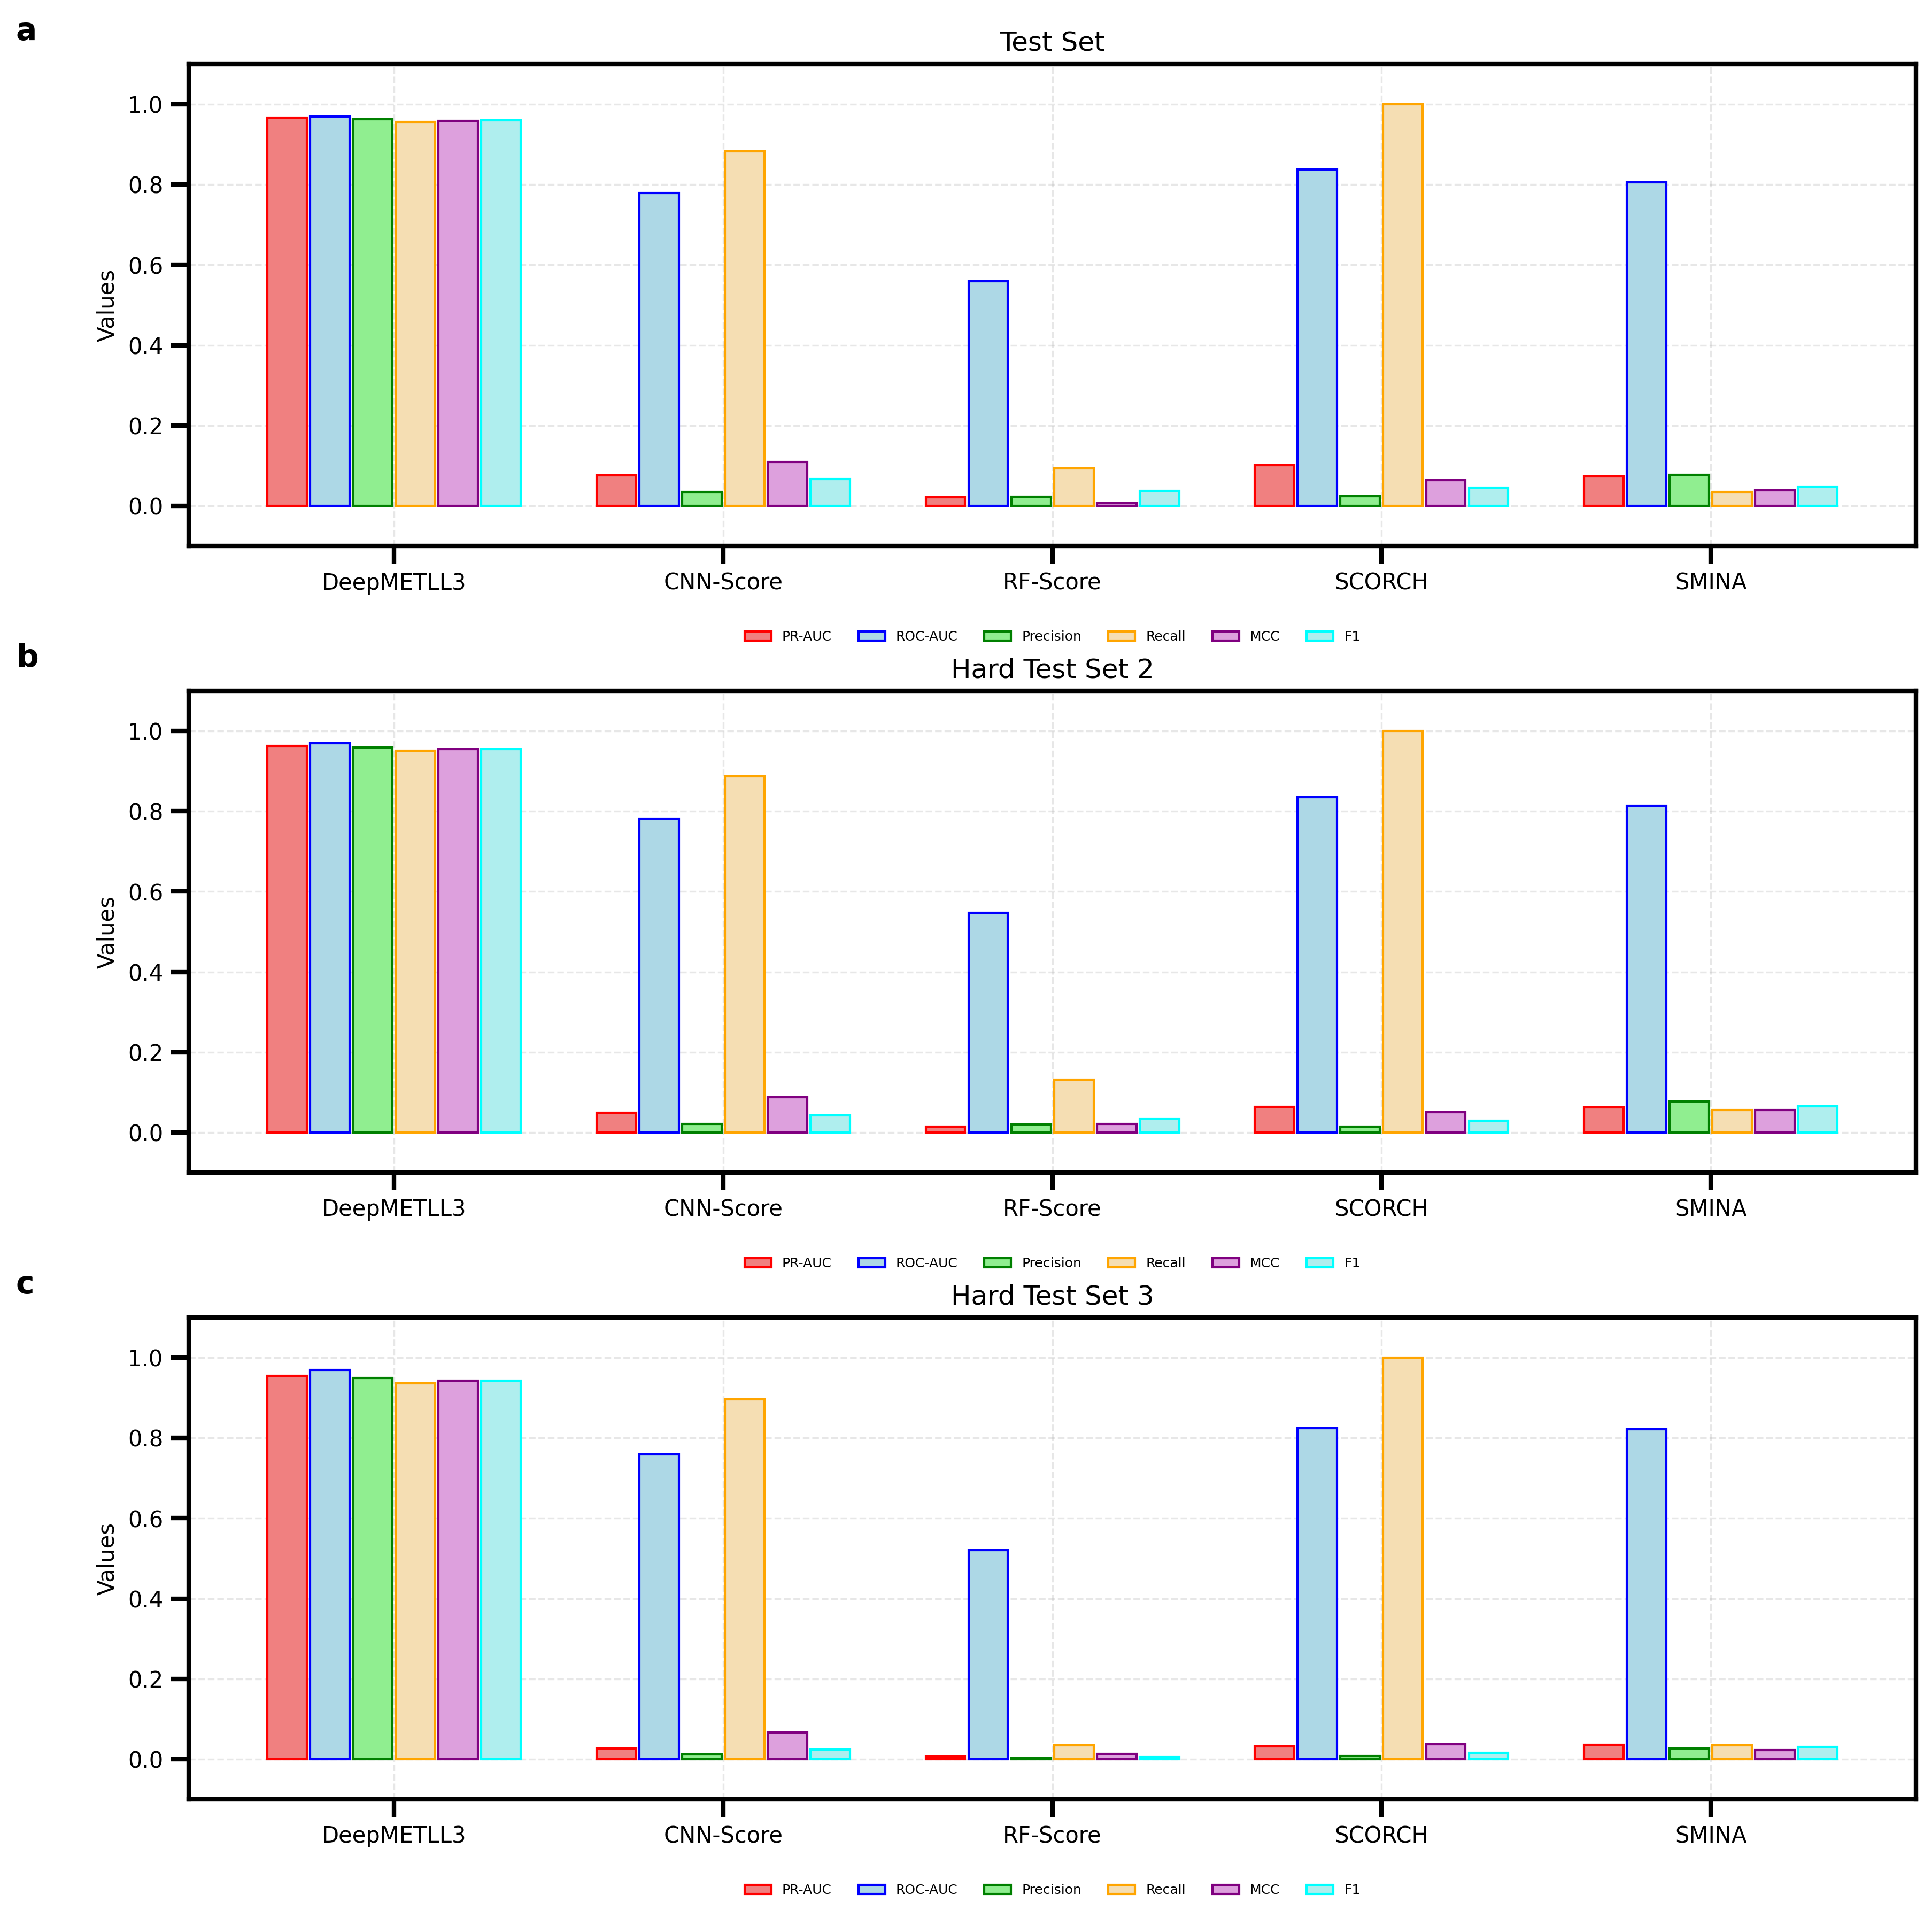

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data for testing (replace these with actual data)
data_set_1 = pd.DataFrame(data_set_1)
data_set_2 = pd.DataFrame(data_set_2)
data_set_3 = pd.DataFrame(data_set_3)

# Set up the 3x1 figure
fig, axes = plt.subplots(3, 1, figsize=(12, 12), dpi=300)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']  # Six colors
light_colors = ['lightcoral', 'lightblue', 'lightgreen', 'wheat', 'plum', 'paleturquoise']

# Adjust bar width to make them narrower
linewidth=1,           # Border width
bar_width = 0.12  # Narrower to leave more space within each model
x_labels = ['DeepMETLL3', 'CNN-Score', 'RF-Score', 'SCORCH', 'SMINA']

# Increase space between bars within each model
bar_spacing = 0.01  # Adjust to increase space between the bars of each model

# Plot data for the first subplot (Metrics Comparison - Set 1)
df_plot_1 = data_set_1
x = np.arange(len(df_plot_1.index))  # Bar positions
axes[0].grid(True, linestyle='--', alpha=0.3, zorder=0)  # Add grid lines
for i, column in enumerate(df_plot_1.columns):
    axes[0].bar(
        x + i * (bar_width + bar_spacing),  # Increased spacing within the model
        df_plot_1[column],
        width=bar_width,
        color=light_colors[i],         # Fill color
        edgecolor=colors[i],     # Border color
        linewidth=linewidth,           # Border width
        label=column,
        zorder=3
    )

axes[0].set_title('Test Set', fontsize=12)
axes[0].set_ylabel('Values', fontsize=10)
axes[0].set_xticks(x + (len(df_plot_1.columns) - 1) * (bar_width + bar_spacing) / 2)  # Adjust tick positions
axes[0].set_xticklabels(x_labels, rotation=0, ha='center', fontsize=10)
axes[0].set_ylim(-0.1, 1.1)
axes[0].legend(fontsize=6, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6, frameon=False)

# Label for subplot (a)
axes[0].text(-0.1, 1.05, 'a', transform=axes[0].transAxes, fontsize=14, fontweight='bold')

# Plot data for the second subplot (Metrics Comparison - Set 2)
df_plot_2 = data_set_2
x = np.arange(len(df_plot_2.index))
axes[1].grid(True, linestyle='--', alpha=0.3, zorder=0)  # Add grid lines
for i, column in enumerate(df_plot_2.columns):
    axes[1].bar(
        x + i * (bar_width + bar_spacing),  # Increased spacing within the model
        df_plot_2[column],
        width=bar_width,
        color=light_colors[i],         # Fill color
        edgecolor=colors[i],     # Border color
        linewidth=linewidth,           # Border width
        label=column,
        zorder=3
    )

axes[1].set_title('Hard Test Set 2', fontsize=12)
axes[1].set_ylabel('Values', fontsize=10)
axes[1].set_xticks(x + (len(df_plot_2.columns) - 1) * (bar_width + bar_spacing) / 2)  # Adjust tick positions
axes[1].set_xticklabels(x_labels, rotation=0, ha='center', fontsize=10)
axes[1].set_ylim(-0.1, 1.1)
axes[1].legend(fontsize=6, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6, frameon=False)

# Label for subplot (b)
axes[1].text(-0.1, 1.05, 'b', transform=axes[1].transAxes, fontsize=14, fontweight='bold')

# Plot data for the third subplot (Metrics Comparison - Set 3)
df_plot_3 = data_set_3
x = np.arange(len(df_plot_3.index))
axes[2].grid(True, linestyle='--', alpha=0.3, zorder=0)  # Add grid lines
for i, column in enumerate(df_plot_3.columns):
    axes[2].bar(
        x + i * (bar_width + bar_spacing),  # Increased spacing within the model
        df_plot_3[column],
        width=bar_width,
        color=light_colors[i],         # Fill color
        edgecolor=colors[i],     # Border color
        linewidth=linewidth,           # Border width
        label=column,
        zorder=3
    )

axes[2].set_title('Hard Test Set 3', fontsize=12)
axes[2].set_ylabel('Values', fontsize=10)
axes[2].set_xticks(x + (len(df_plot_3.columns) - 1) * (bar_width + bar_spacing) / 2)  # Adjust tick positions
axes[2].set_xticklabels(x_labels, rotation=0, ha='center', fontsize=10)
axes[2].set_ylim(-0.1, 1.1)
axes[2].legend(fontsize=6, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6, frameon=False)

# Set border line width and major tick properties
for ax in axes:
    # Adjust the border line width
    for spine in ax.spines.values():
        spine.set_linewidth(2)  # Adjust the border line width
    
    # Adjust major ticks
    ax.tick_params(axis='both', which='major', length=8, width=2)  # Adjust tick length and width
    ax.tick_params(axis='both', which='minor', length=4, width=1.0)  # Optional: Customize minor ticks

# Label for subplot (c)
axes[2].text(-0.1, 1.05, 'c', transform=axes[2].transAxes, fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Adjust subplots spacing to increase space between models
plt.subplots_adjust(wspace=0.2, hspace=0.3)  # Increase horizontal spacing between subplots

# Set figure background
fig.patch.set_facecolor('white')
fig.patch.set_edgecolor('white')

# plt.savefig('/home/juni/working/mettl3/voxels_data/figure_7.tif',
#             dpi=300,
#             format='tiff',
#             pil_kwargs={"compression": "tiff_lzw"},  # Use LZW compression
#             bbox_inches='tight')

plt.show()
